# Author : Pushkar Zend
## The Spark Foundation.
### Task 6 : Prediction using Decision Tree Algorithm.
#### Create the Decision Tree classifier for Iris dataset and visualize it graphically.
#### Statement : The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

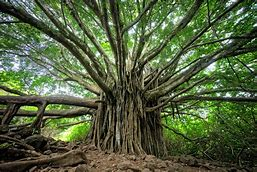

What is Decision Tree Algorithm?

The decision tree algorithm tries to solve the problem, by using tree representation. Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label. Place the best attribute of the dataset at the root of the tree.

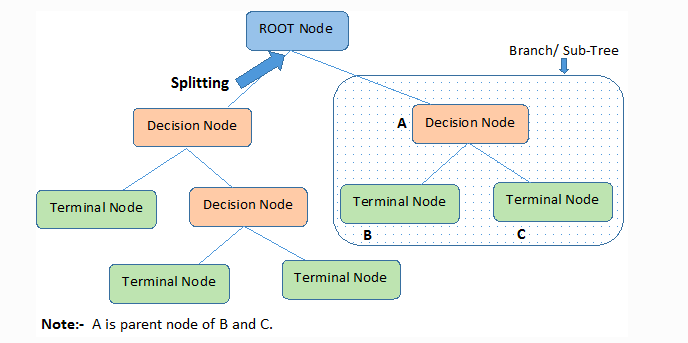

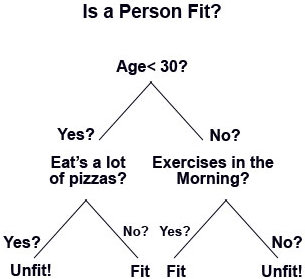

What are the steps ?
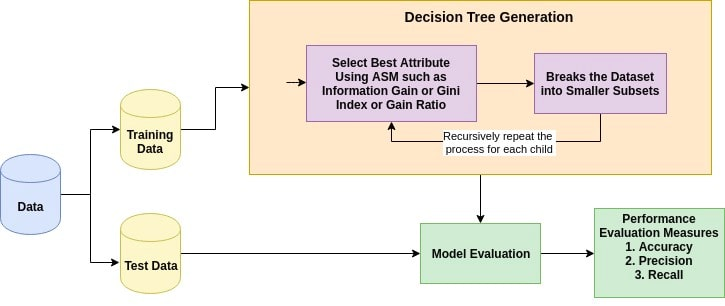

In [17]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
#Reading the dataset
dataset  = sns.load_dataset('iris') #this data set is part of preloaded library sns so we had not used pd.read_csv

In [19]:
#Checking the data
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
dataset.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [6]:
len(dataset)

150

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#EDA steps
X = dataset.iloc[:, [0,1,2,3]].values
y = dataset.species.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [11]:
#Splitting the data into training & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [20]:
len(X_train)


112

In [21]:
len(X_test)

38

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:
#Feature Engineering Steps


# Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [14]:
y_pred = model.predict(X_test)
y_pred

array(['setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'setosa'], dtype=object)

In [15]:
#Classification Metrics - To check the final results
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result1 = accuracy_score(y_test, y_pred)
print('Accuracy is: ', result1*100)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy is:  92.10526315789474
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.90      0.82      0.86        11
   virginica       0.85      0.92      0.88        12

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38

[[15  0  0]
 [ 0  9  2]
 [ 0  1 11]]


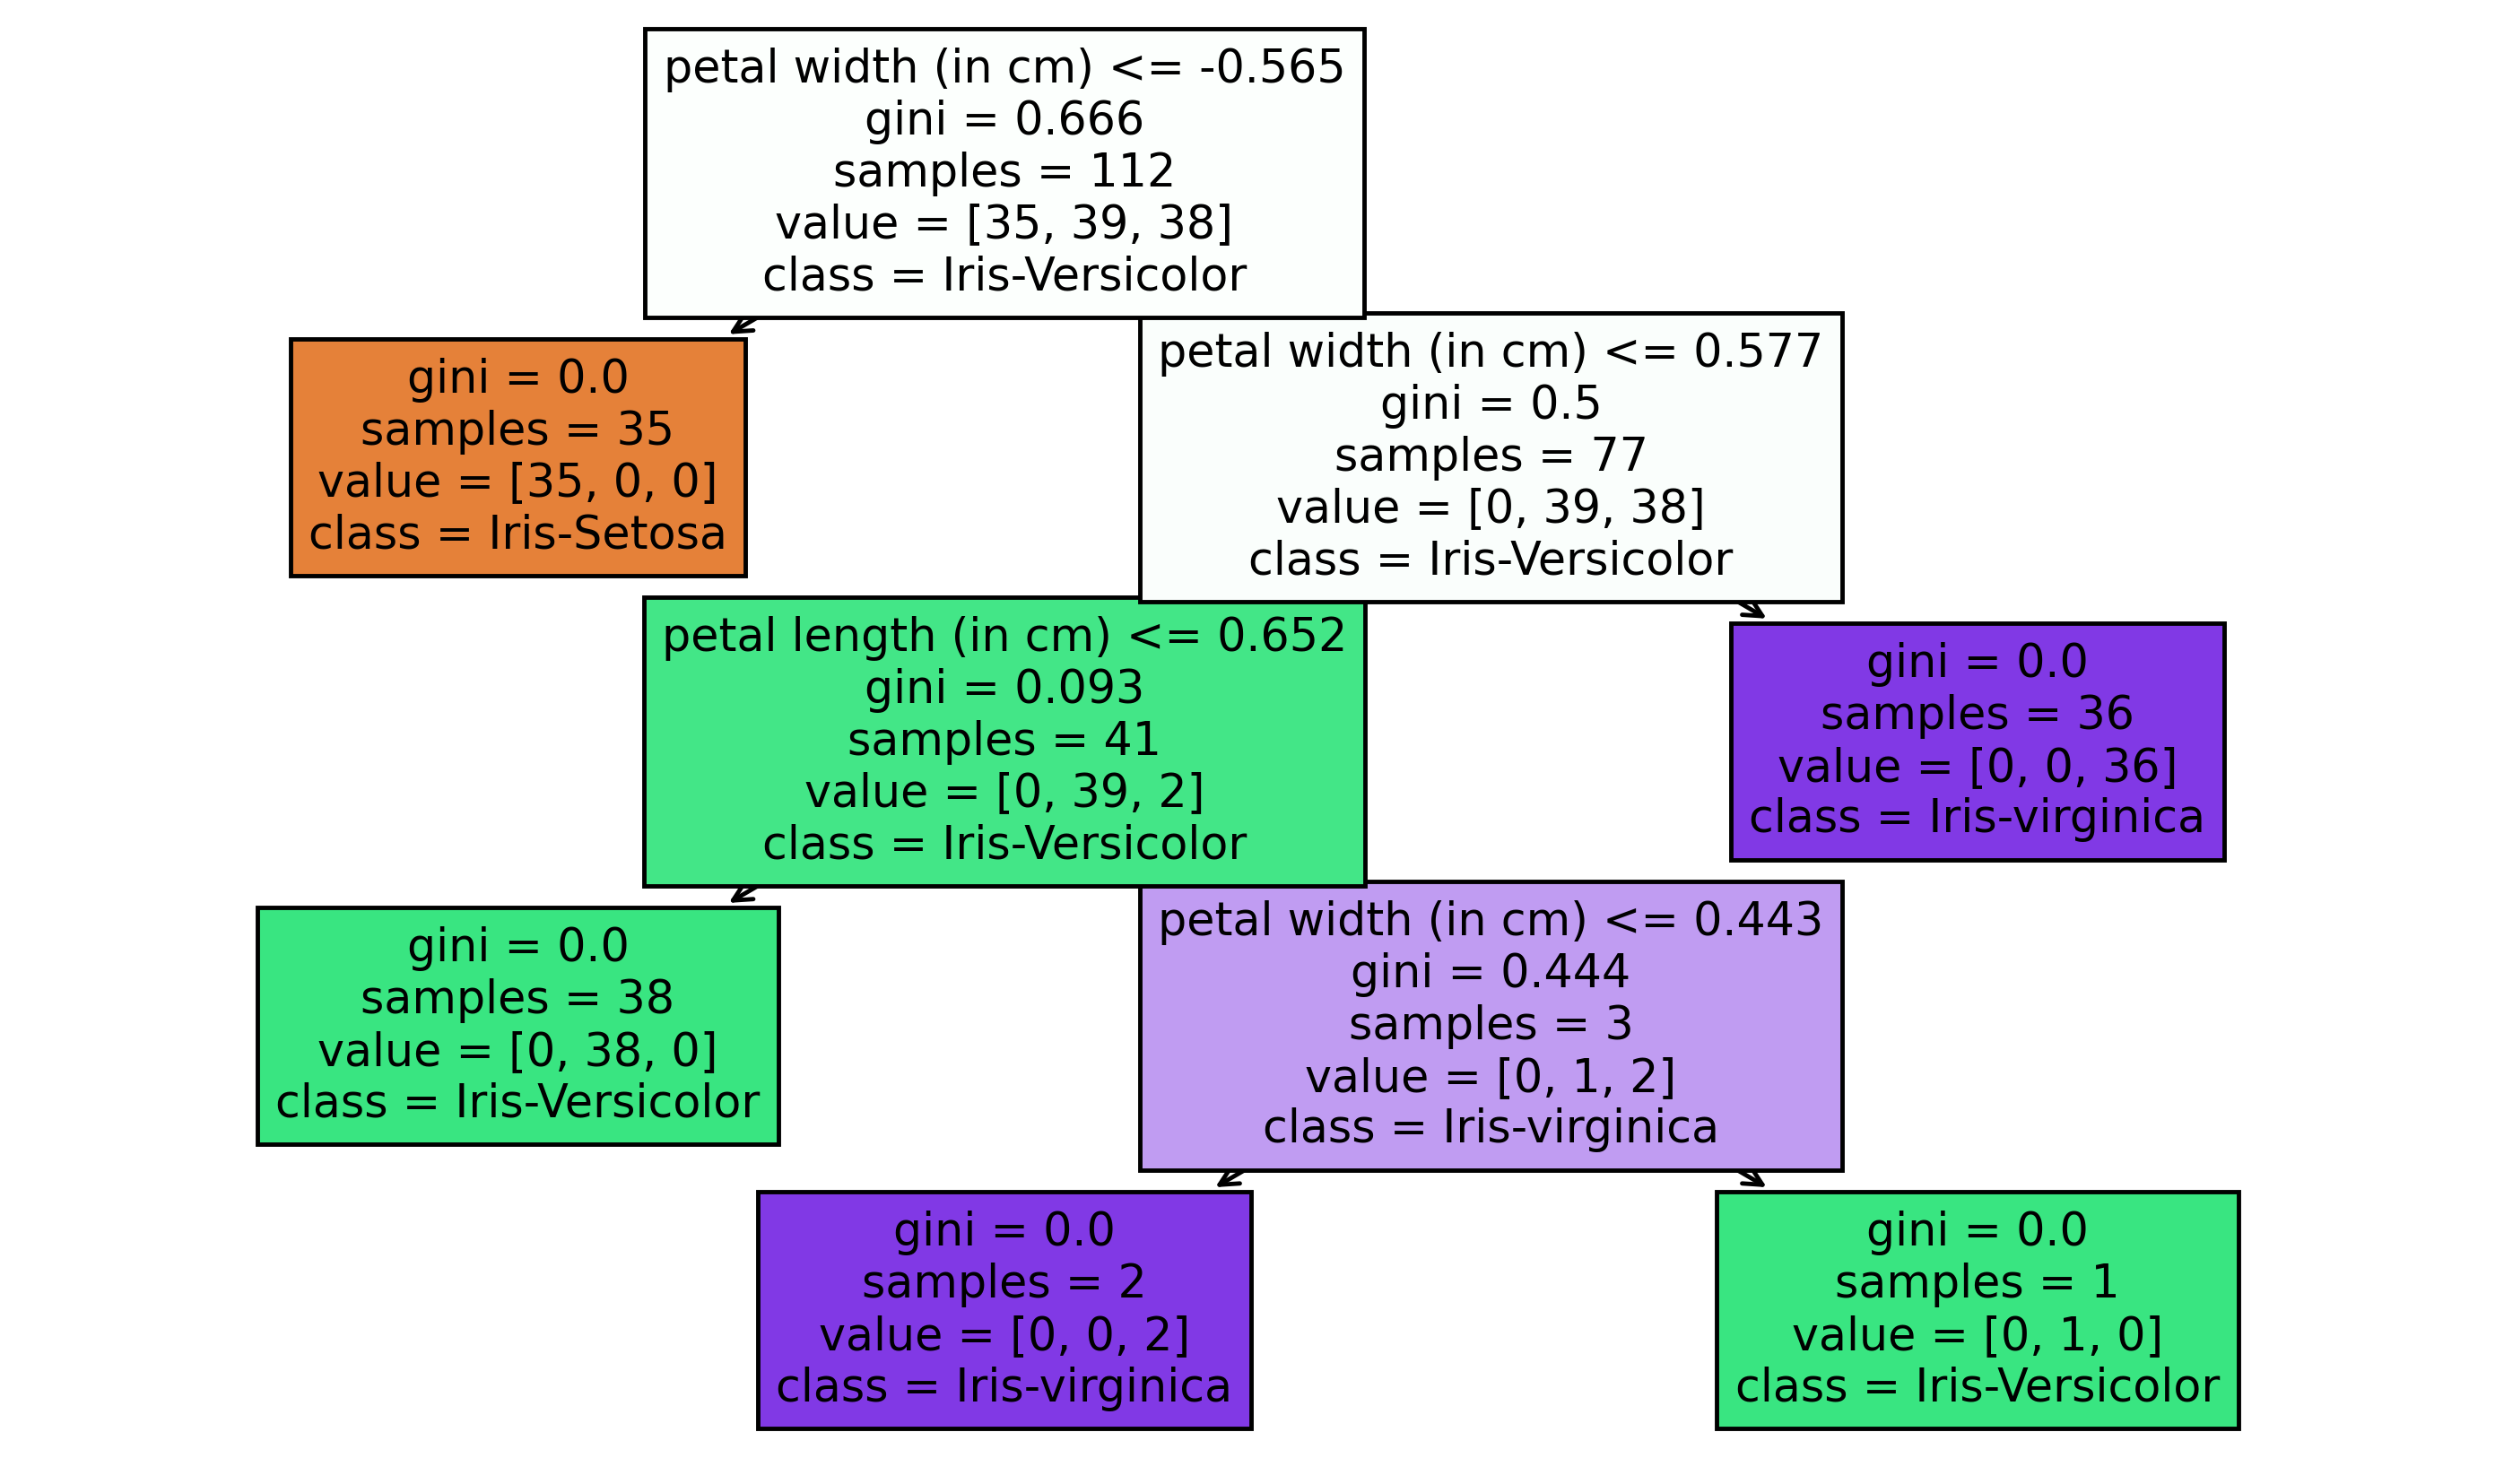

In [24]:
#Install required libraries
from sklearn import tree
import matplotlib.pyplot as plt


featName=['sepal length ( in cm)','sepal width (in cm)','petal length (in cm)','petal width (in cm)']
clsName=['Iris-Setosa','Iris-Versicolor','Iris-virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6), dpi = 350)

tree.plot_tree(model, feature_names = featName, class_names = clsName, filled = True);


### You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.

###  Feeding new data to the model to predict its class

In [26]:
sepal_length=6.7
sepal_width=4.0
petal_length=6.1
petal_width=1.5
new_info = [[sepal_length,sepal_width,petal_length,petal_width]]
result=model.predict(new_info)
print(result)

['virginica']


# Thank You